In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
dataFile=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\signal_data_total_v1.csv'

In [3]:
myData=pd.read_csv(dataFile)

In [4]:
# add physical time based on DHB length
myData['age_track'] = (myData.DHB_len - 1) *10 / 60

In [5]:
# add day of experiments (with 'd' because otherwise seaborn fails to recognize it as a category)
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [6]:
myData.head()

,Unnamed: 0,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,ab2 (MCM),...,nucleus_Otsu_inner_ch2,nucleus_Otsu_inner_ch3,nucleus_Otsu_outer_volume,nucleus_Otsu_outer_ch1,nucleus_Otsu_outer_ch2,nucleus_Otsu_outer_ch3,nucleus_otsu_sphere_inner_volume,nucleus_otsu_sphere_outer_volume,age_track,day
0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,956,HP1B,1,MCM3,...,158746493.0,1.246769e+09,322121.0,2.099590e+09,1.003047e+09,7.687183e+09,0.0,0.0,0.666667,d20190625
1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,HP1B,1,MCM3,...,183584081.0,1.457227e+09,321844.0,1.981743e+09,9.790310e+08,8.090406e+09,0.0,0.0,0.666667,d20190625
2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,HP1B,1,MCM3,...,229507070.0,1.469553e+09,287538.0,2.365673e+09,1.121201e+09,8.483717e+09,0.0,0.0,2.000000,d20190625
3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,HP1B,1,MCM3,...,232045174.0,1.484302e+09,298383.0,2.060637e+09,1.039858e+09,7.789178e+09,0.0,0.0,2.000000,d20190625
4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,HP1B,1,MCM3,...,291875166.0,2.993056e+09,602406.0,5.265607e+09,1.386750e+09,1.656457e+10,0.0,0.0,19.500000,d20190625


In [7]:
indexNames = myData[ myData['hetChrom_newctl_volume'] == 0 ].index

In [8]:
myData=myData.drop(indexNames)

In [9]:
myTrendData=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [10]:
myTrendDatand=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [11]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [12]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

# plots for deconvolved

## original

<IPython.core.display.Javascript object>


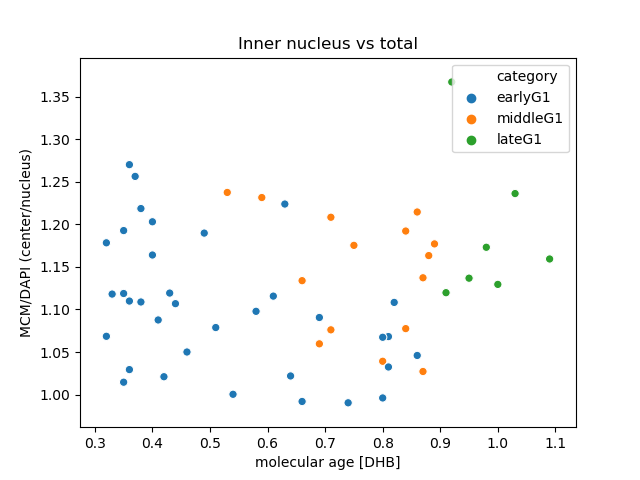

Text(0.5, 1.0, 'Inner nucleus vs total')

In [46]:
%matplotlib notebook


total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu_inner_ch2/myDataSel.nucleus_Otsu_inner_ch3)


myDataSel['temp']=center/total
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (center/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("Inner nucleus vs total")

<IPython.core.display.Javascript object>


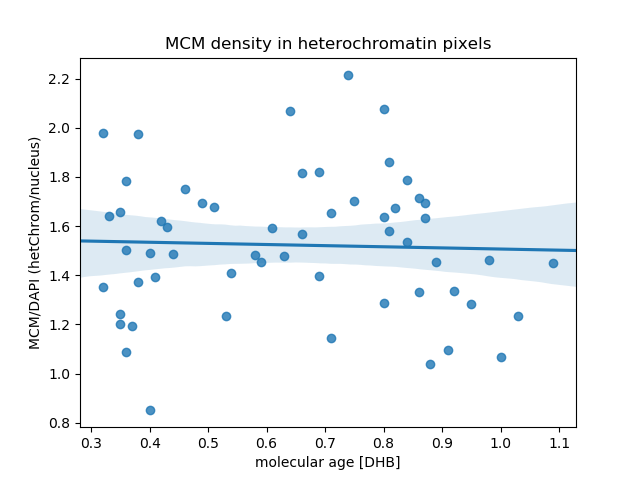

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [19]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("DAPI/DAPI (center/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("DAPI signals center/nucleus")

<IPython.core.display.Javascript object>


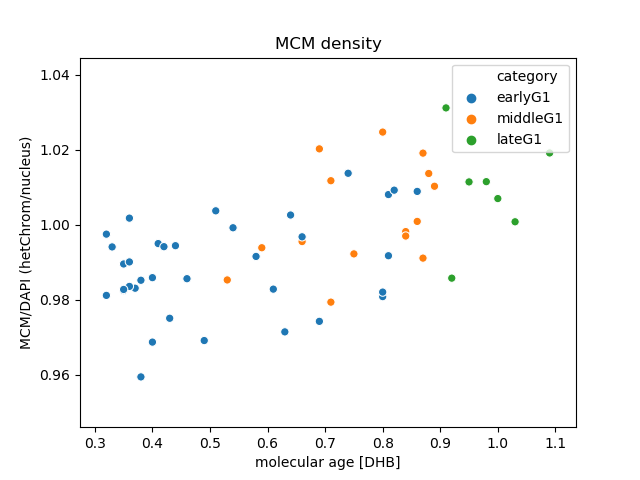

Text(0.5, 1.0, 'MCM density')

In [47]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu_outer_ch2/myDataSel.nucleus_Otsu_outer_ch3)


myDataSel['temp']=center/total
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density")

<IPython.core.display.Javascript object>


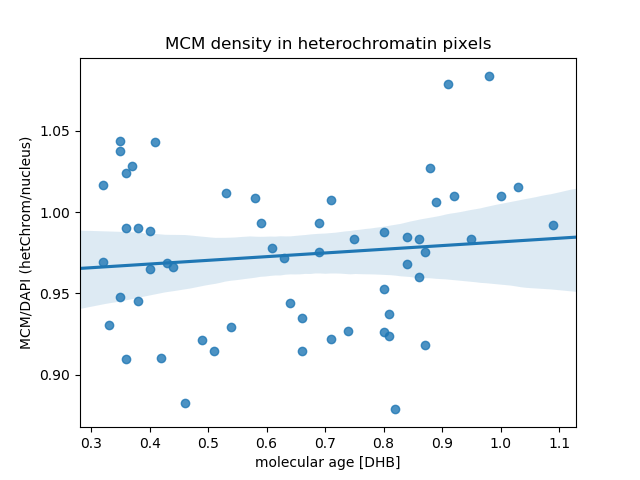

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [20]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

## Modifications

In [29]:
mod=0.3

myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


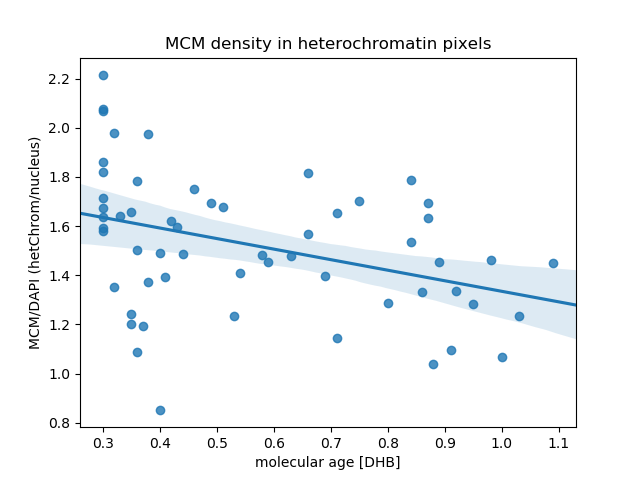

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [30]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")



<IPython.core.display.Javascript object>


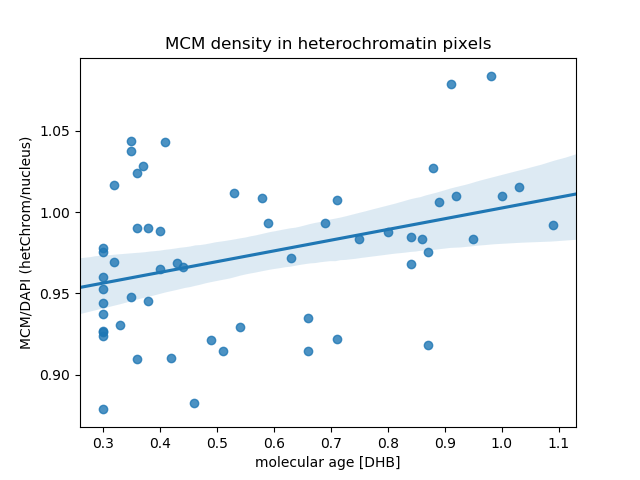

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [31]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [32]:
mod=0

myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


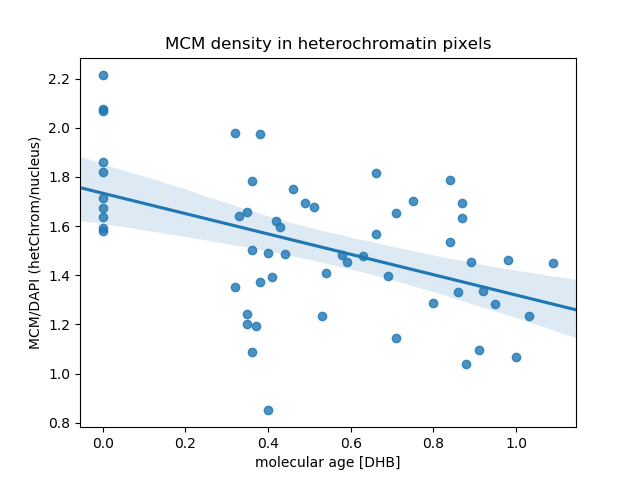

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [33]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")



<IPython.core.display.Javascript object>


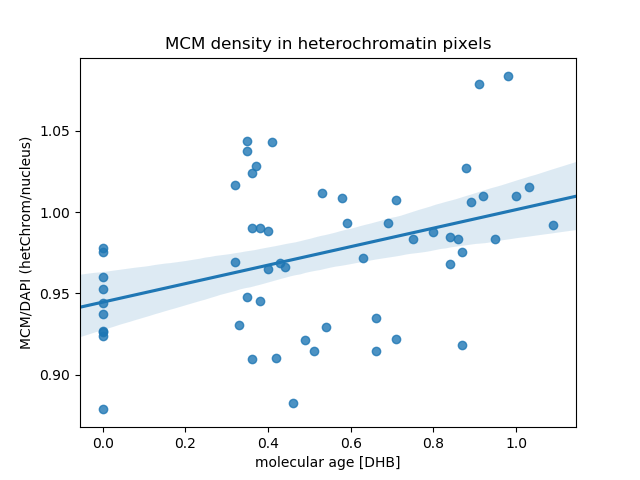

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [34]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [35]:
mod=0.5

myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


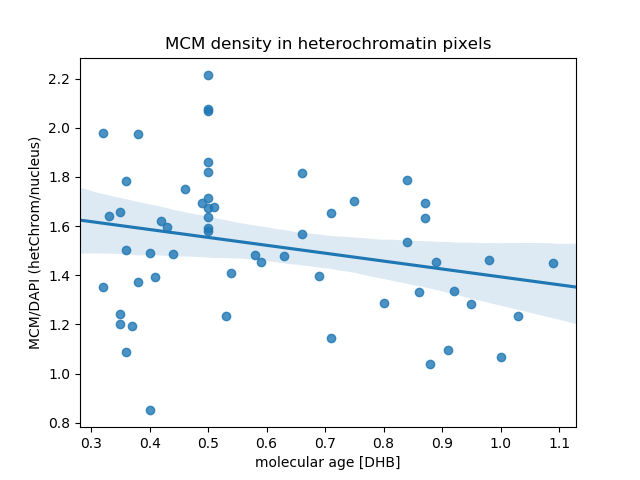

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [36]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")



<IPython.core.display.Javascript object>


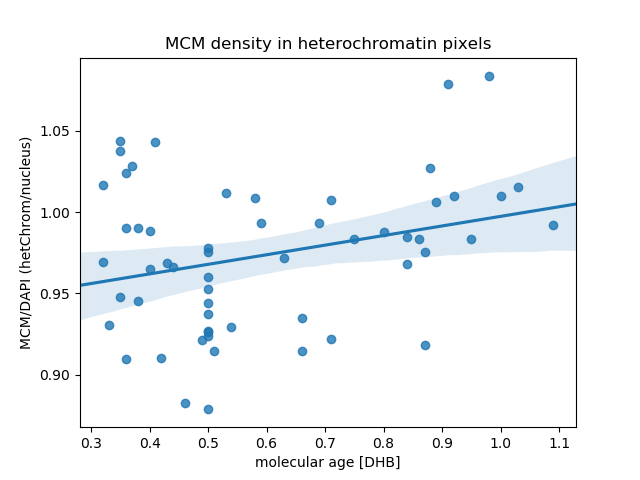

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [37]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [38]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel_mol_age_change=myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=-1*myDataSel['mol_age_mod']+np.max(myDataSel_mol_age_change)

<IPython.core.display.Javascript object>


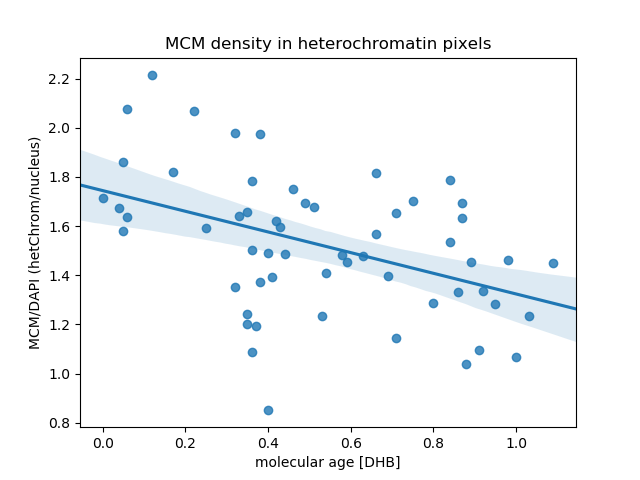

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [39]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_inner_20_ch3/myDataSel.nucleus_Otsu_inner_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")



<IPython.core.display.Javascript object>


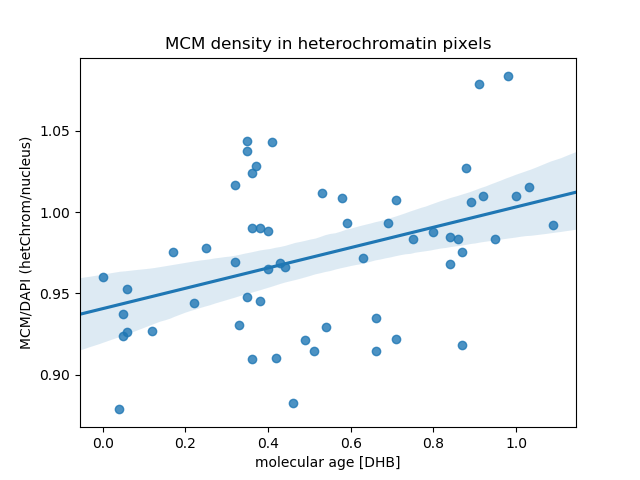

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [40]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_sphere_outer_20_ch3/myDataSel.nucleus_Otsu_outer_ch3)/ (myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")